In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix 
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import roc_curve, auc, confusion_matrix
from sklearn.preprocessing import StandardScaler

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data = pd.read_csv('/content/drive/MyDrive/01Training/Data/Data/diamonds.csv')

In [4]:
data.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [5]:
data.describe()

,Unnamed: 0,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,26970.500000,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,15571.281097,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,13485.750000,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,26970.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40455.250000,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,53940.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [6]:
price = data['price']

In [7]:
data["id"] = data.index + 1

In [8]:
del data[data.columns[0]]

In [9]:
data.set_index('id')

,carat,cut,color,clarity,depth,table,price,x,y,z
id,,,,,,,,,,
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56


(array([25335.,  9328.,  7393.,  3878.,  2364.,  1745.,  1306.,  1002.,
          863.,   726.]),
 array([  326. ,  2175.7,  4025.4,  5875.1,  7724.8,  9574.5, 11424.2,
        13273.9, 15123.6, 16973.3, 18823. ]),
 <a list of 10 Patch objects>)

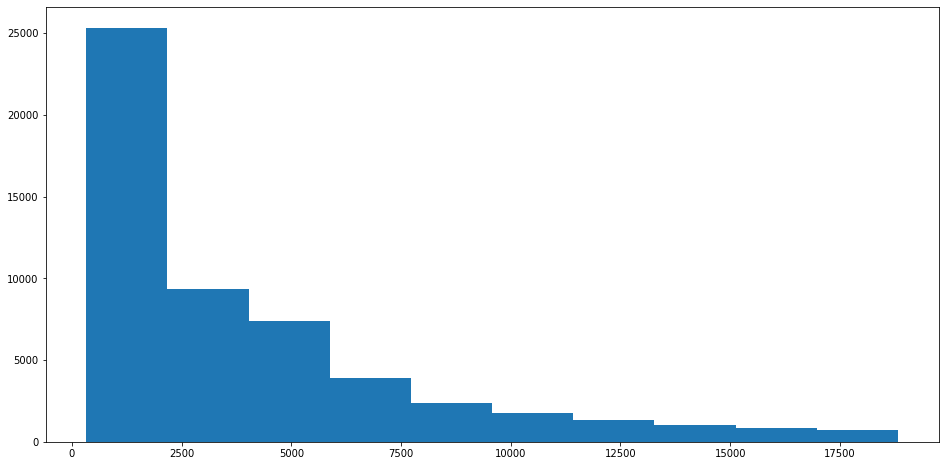

In [10]:
plt.figure(figsize=(16,8))
plt.hist(price)

In [11]:
color = data['color']

(array([ 9797.,  5422.,     0.,  2808.,     0.,  8304.,  9542.,     0.,
        11292.,  6775.]),
 array([0. , 0.6, 1.2, 1.8, 2.4, 3. , 3.6, 4.2, 4.8, 5.4, 6. ]),
 <a list of 10 Patch objects>)

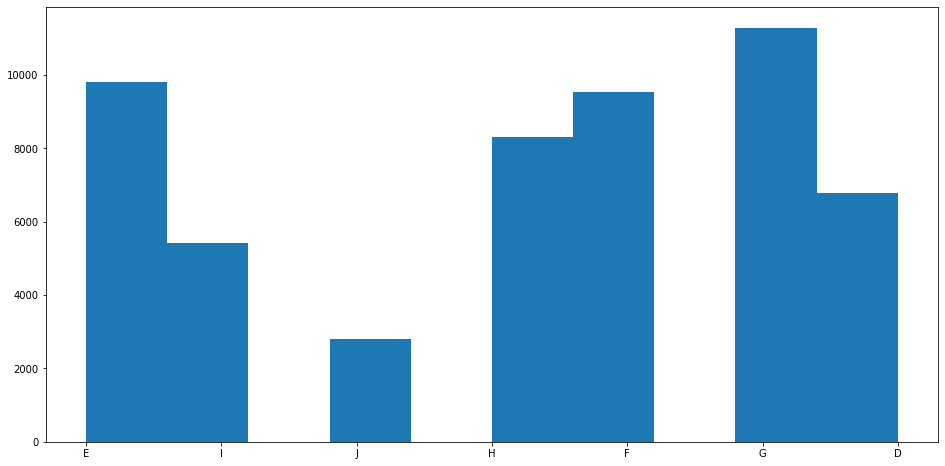

In [12]:
plt.figure(figsize = (16,8))
plt.hist(color)

In [13]:
fig = px.box(data, 
             x="color", 
             y="price", 
             color="color")
fig.show()

In [14]:
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,id
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,1
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,2
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,3
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,4
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,5


In [15]:
cut = data['cut']

(array([21551.,     0., 13791.,     0.,     0.,  4906.,     0., 12082.,
            0.,  1610.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <a list of 10 Patch objects>)

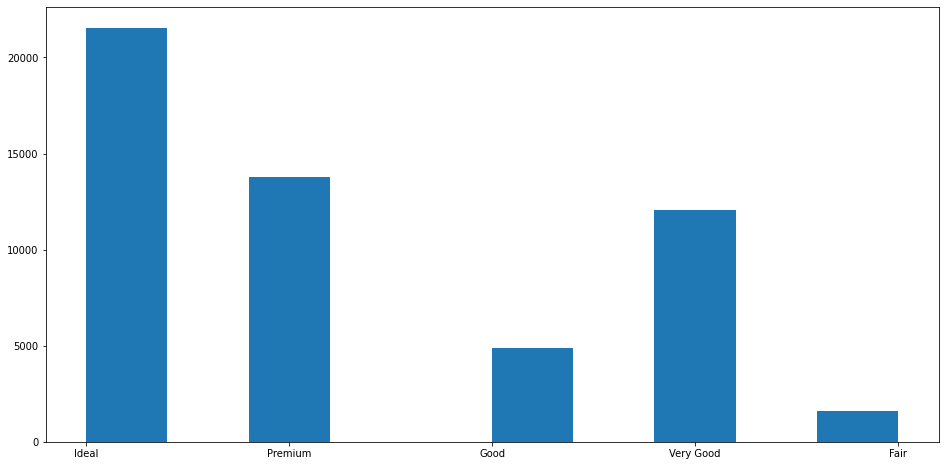

In [16]:
plt.figure(figsize = (16,8))
plt.hist(cut)

In [17]:
fig = px.box(data, 
             x="cut", 
             y="price", 
             color="cut")
fig.show()

In [18]:
data["color"] = data["color"].map({"E": 1, 
                               "I": 2, 
                               "J": 3,
                               "H": 4,
                               "F": 5,
                               "G": 6,
                               "D": 7
                               })

In [19]:
data["cut"] = data["cut"].map({"Ideal": 1, 
                               "Premium": 2, 
                               "Good": 3,
                               "Very Good": 4,
                               "Fair": 5})

In [20]:
data['dimensions'] = data['x']*data['y']*data['x']

In [21]:
data['dimensions'].describe()

count    53940.000000
mean       210.420677
std        125.292036
min          0.000000
25%        104.930793
50%        185.191292
75%        279.295275
max       3854.893090
Name: dimensions, dtype: float64

In [22]:
px.scatter(data, x='carat', y='price', width = 800, height = 600, title = 'Carat Size')

In [23]:
px.scatter(data, x='dimensions', y='price', width = 800, height = 600, title='Dimension Size')

In [24]:
x = data[["carat", "cut", "color", "dimensions"]]
y = data[["price"]]

In [25]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=.2, random_state = 111)

In [26]:
model = LinearRegression()
model.fit(x_train, y_train)
model.predict(x_test)

pred = model.predict(x_test)
y_lin_pred = model.predict(x_test)

print('Score: %.3f' % model.score(x_train, y_train))
print('Mean squared error: %.3f' % mean_squared_error(y_test, y_lin_pred))
print('R2 Score: %.3f' % r2_score(y_test, y_lin_pred))


Score: 0.856
Mean squared error: 2447914.551
R2 Score: 0.844


In [29]:
model = RandomForestRegressor()
model.fit(x_train, y_train)
model.predict(x_test)

pred = model.predict(x_test)
y_lin_pred = model.predict(x_test)

print('Score: %.3f' % model.score(x_train, y_train))
print('Mean squared error: %.3f' % mean_squared_error(y_test, y_lin_pred))
print('R2 Score: %.3f' % r2_score(y_test, y_lin_pred))


<ipython-input-29-35d20b5dd3ab>:2: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Score: 0.983
Mean squared error: 1587385.565
R2 Score: 0.899


### **Below is a set of parameters for Diamond details. Once inputted, Random Forest Regressor will predict the price in USD.**

---



In [28]:
#Enter 4 paramters for the quality of a diamond to predict the Price

print('Diamond Details')
a = float(input("Carat Size(0.2-5.0): "))
b = int(input("Cut Type (Ideal: 1, Premium: 2, Good: 3, Very Good: 4, Fair: 5): "))
c = int(input("Color (E: 1, I: 2, J: 3, H: 4, F: 5, G = 6, D: 7): "))
d = float(input("Dimensions: "))

features = np.array([[a, b, c, d]])
print("Predicted Diamond's Price = ", '$', *model.predict(features))

Diamond Details
Carat Size(0.2-5.0): 1
Cut Type (Ideal: 1, Premium: 2, Good: 3, Very Good: 4, Fair: 5): 1
Color (E: 1, I: 2, J: 3, H: 4, F: 5, G = 6, D: 7): 5
Dimensions: 233
Predicted Diamond's Price =  $ 4128.33


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning:

X does not have valid feature names, but RandomForestRegressor was fitted with feature names

